<a href="https://colab.research.google.com/github/sandroormeno/Workshop-Classification_TF_2.X/blob/master/Lecture_02c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
%cd "/content/drive/My Drive/Colab Notebooks/workshop_tensorFlow"

/content/drive/My Drive/Colab Notebooks/workshop_tensorFlow


In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
from PIL import Image
import numpy as np
import os
from random import shuffle
from keras.preprocessing import image
import matplotlib.pyplot as plt
import progressbar
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

Using TensorFlow backend.


In [0]:
TRAIN_DIR = './train/'
TEST_DIR = './test/'

In [23]:
count = 0
for folders in os.listdir(TRAIN_DIR):
  path = os.path.join(TRAIN_DIR, folders)
  # print(path)
  for files in os.listdir(path):
    count += 1
    # print(files)
print(count)

724


In [24]:
def get_size_statistics(dir):
    heights = []
    widths = []
    img_count = 0
    for folders in os.listdir(dir):
      path = os.path.join(dir, folders)
      for files in os.listdir(path):
        data = os.path.join(path, files) 
        img_count += 1        
        data = np.array(Image.open(data))
        heights.append(data.shape[0])
        widths.append(data.shape[1])   

    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print()
    print("Average Height: " + str(avg_height))
    print("Average Width: " + str(avg_width))
    print("Total data counted: " + str(img_count))

get_size_statistics(TRAIN_DIR)


Average Height: 189.27348066298342
Average Width: 269.6878453038674
Total data counted: 724


In [0]:
def label_img(name):
    word_label = name.split('-')[0]
    if word_label == 'causa_rellena': return np.array([1, 0, 0])
    elif word_label == 'ceviche' : return np.array([0, 1, 0])
    elif word_label == 'pollo_a_la_brasa' : return np.array([0, 0, 1])

In [0]:
IMG_SIZE = 224

In [0]:
def load_data(dir, total):
  progressbar.streams.flush()
  bar = progressbar.ProgressBar(max_value=total)
  train_data = []
  c = 0
  for folders in os.listdir(dir):   
    path = os.path.join(dir, folders)
    for files in os.listdir(path):
      label = label_img(folders)
      data = os.path.join(path, files)               
      img = Image.open(data)
      img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
      img = image.img_to_array(img)
      #img = img/255 #normalizatiuon
      train_data.append([img, label]) 
      bar.update(c) 
      c += 1         
    shuffle(train_data)
  return train_data

In [28]:
train_data = load_data(TRAIN_DIR, count)

 98% (715 of 724) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

In [0]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
trainLabels = np.array([i[1] for i in train_data])

In [0]:
tf.keras.backend.clear_session()

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 96)        5

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [34]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

Train on 724 samples
Epoch 1/5
724/724 [==============================] - 2s 3ms/sample - loss: 0.5349 - accuracy: 0.7436
Epoch 2/5
724/724 [==============================] - 1s 2ms/sample - loss: 0.3175 - accuracy: 0.8729
Epoch 3/5
724/724 [==============================] - 1s 2ms/sample - loss: 0.2423 - accuracy: 0.9139
Epoch 4/5
724/724 [==============================] - 1s 2ms/sample - loss: 0.2418 - accuracy: 0.9093
Epoch 5/5
724/724 [==============================] - 1s 2ms/sample - loss: 0.1632 - accuracy: 0.9480


In [36]:
test_data = load_data(TEST_DIR, 48) 

 97% (47 of 48) |####################### | Elapsed Time: 0:00:08 ETA:   0:00:00

In [37]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

86.80555820465088


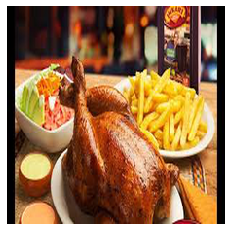

[0 0 1]


In [40]:
num_test = 12
plt.imshow(test_data[num_test][0]/255)
plt.axis('off')
plt.show()
print(test_data[num_test][1])

In [63]:
test = test_data[num_test][0].reshape(-1, IMG_SIZE, IMG_SIZE, 3)
result = model.predict(test)
if np.argmax(result) == 0:
  print("causa_rellena")
elif np.argmax(result) == 1:
  print("ceviche")
else:
  print("pollo_a_la_brasa")

pollo_a_la_brasa
